# U1B model: neutrino masses + DM scan

In [1]:
import numpy as np
import pandas as pd
import subprocess
import time
import sys

%matplotlib inline
import matplotlib.pyplot as plt 

In [2]:
import pyslha
import pyU1B_LesHouches_generator
import neutrino_analytic_v2
import NEUTRINO2018

In [3]:
#For good plots
plt.rcParams.update({'font.size': 20}) 
#plt.rc('font',size='18')

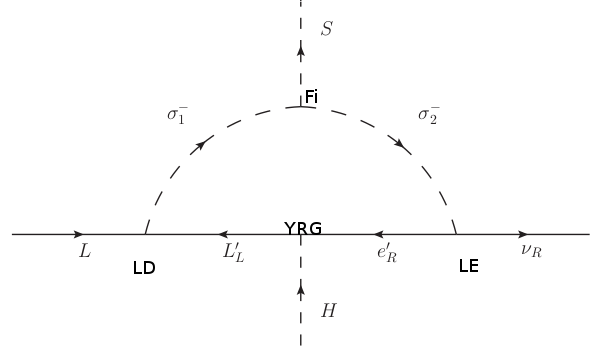

In [4]:
from IPython.display import Image
Image("zee-couplings.png")

Read the scanning

In [18]:
#Read old file
xd = pd.read_csv('general-scan.csv')
del xd['Unnamed: 0']

xd.shape

(1944, 105)

## Dark matter $\Omega h^2$
Planck results 2018

In [19]:
#Experimental values for DM:Planck results 2018
e = 10
Omega = 0.1200
Omega_min=Omega - e*0.0012
Omega_max=Omega + e*0.0012
print( Omega_min, Omega,Omega_max)

0.108 0.12 0.132


In [20]:
xd = xd[np.logical_and(xd.Omega > Omega_min, xd.Omega < Omega_max)]

In [21]:
xd.shape

(273, 105)

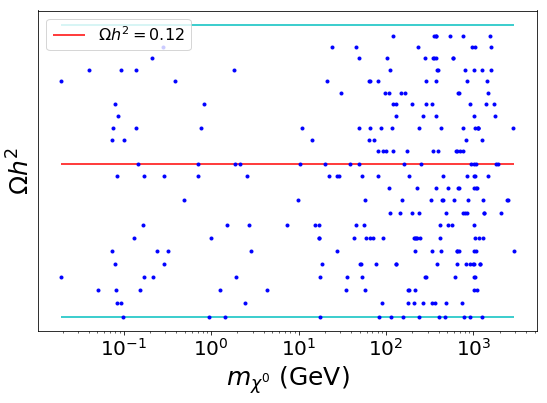

In [22]:
plt.figure(figsize=(8,6))

plt.loglog(xd.mchi,xd.Omega,'b.',label=r'')

plt.hlines(Omega_max,xd.mchi.min(),xd.mchi.max(), 'c',label=r'')
plt.hlines(Omega_min,xd.mchi.min(),xd.mchi.max(), 'c',label=r'')

plt.hlines(Omega,xd.mchi.min(),xd.mchi.max(), 'r',label=r'$\Omega h^2=$0.12')

plt.xlabel(r'$m_{\chi^0}$ (GeV)',size=25)
plt.ylabel(r'$\Omega h^2$',size=25)
plt.legend(prop={'size':16},loc='best')

plt.tight_layout()
#plt.savefig('plots/DM_mchi.pdf')
plt.show()

## Neutrino masses
Status of neutrino oscillations 2018: first hint for normal mass ordering and improved CP sensitivity. https://arxiv.org/abs/1708.01186

/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:3179: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=10.0, top=10.0
  'bottom=%s, top=%s') % (bottom, top))


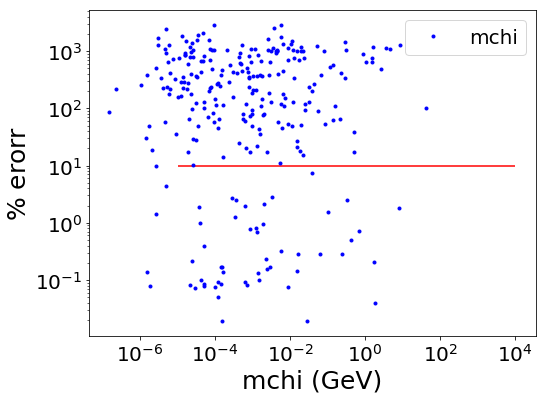

In [23]:
plt.figure(figsize=(8,6))

plt.hlines(10, 1e-5,1e4,'r')

plt.loglog(np.abs(xd.mnu2-xd.mv2)*100/xd.mv2,xd.mchi,'b.')

plt.xlabel(r'mchi (GeV)',size=25)
plt.ylabel(r'$\%$ erorr',size=25)
plt.legend()

plt.show()

Improbing the reconstruction of the neutrino masses to the $10\%$

In [24]:
xd = xd[np.logical_and(np.abs(xd.mnu2-xd.mv2)*100/xd.mv2<10., np.abs(xd.mnu3-xd.mv3)*100/xd.mv3<10.)]

In [25]:
xd.shape

(272, 105)

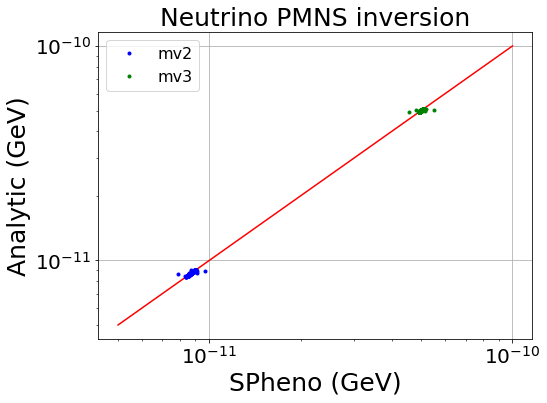

In [26]:
plt.figure(figsize=(8,6))

a = np.linspace(5e-12,1e-10,5)
plt.plot(a,a,'r-')

plt.loglog(xd.mnu2,xd.mv2,'b.')
plt.loglog(xd.mnu3,xd.mv3,'g.')

plt.title(r'Neutrino PMNS inversion',size=25)
plt.xlabel(r'SPheno (GeV)',size=25)
plt.ylabel(r'Analytic (GeV)',size=25)
plt.legend(prop={'size':16},loc='best')

plt.grid()

plt.tight_layout()
#plt.savefig('plots/neutrino_masses.pdf')
plt.show()

### Z' mass

\begin{equation}
M_{Z^{'}} =Q_{\Phi}g^{'} v_\Phi =  5 g^{'} v_\Phi
\end{equation}

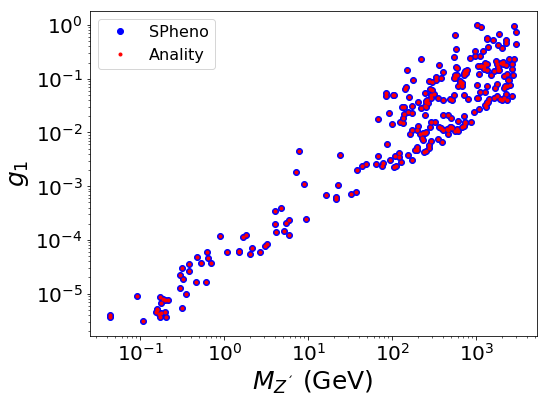

In [27]:
plt.figure(figsize=(8,6))

plt.loglog(xd.MZp,xd.g1p,'bo',label='SPheno')

plt.loglog(5.*xd.g1p*xd.vx,xd.g1p,'r.',label='Anality')

#plt.plot(xd.g1p,xd.MZp/1000, 'k.')

plt.xlabel(r'$M_{Z^{´}}$ (GeV)',size=25)
plt.ylabel(r'$g_1$',size=25)
plt.legend(prop={'size':16},loc='best')

plt.tight_layout()
#plt.savefig('plots/g1_MZp.pdf')
plt.show()

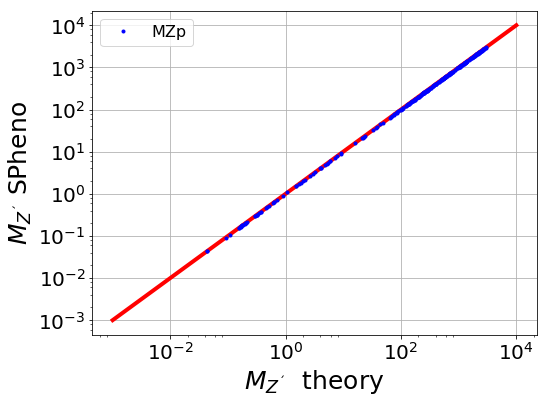

In [28]:
plt.figure(figsize=(8,6))

a = np.linspace(1e-3,1e+4,5)
plt.plot(a,a,'r-', linewidth=4)

plt.loglog(5.*xd.g1p*xd.vx,xd.MZp,'b.')

plt.xlabel(r'$M_{Z^{´}}$  theory',size=25)
plt.ylabel(r'$M_{Z^{´}}$ SPheno',size=25)
plt.grid()

plt.legend(prop={'size':16},loc='best')

plt.tight_layout()
plt.show()

# Direct and indirec detection

In [29]:
from indirectdirect import *

In [30]:
from scipy import interpolate

#XENON1T .txt
names1 = ['MDM', 'XENON1TSI']
xe = np.loadtxt('/home/anferivera/Work/Documents_compartidos/fits_experiments/fit_XENON1T/XENON1T-2018.txt')
xdxe = pd.DataFrame(xe, columns=names1)

XENON1T=interpolate.interp1d(xdxe.MDM,xdxe.XENON1TSI)

#PANDAS 1708.06917
names1 = ['MDM', 'pandasSI']
a = np.loadtxt('/home/anferivera/Work/Documents_compartidos/fits_experiments/PandaX/pandaXII.txt')
dd1 = pd.DataFrame(a, columns=names1)

pandaX=interpolate.interp1d(dd1.MDM,dd1.pandasSI)

#LZ prospects 1802.06039
names1 = ['MDM', 'LZ']
a = pd.read_csv('/home/anferivera/Work/Documents_compartidos/fits_experiments/fit_LZ/LZ-SI-prosp-2018.csv',names=names1, header=None)
LZSI = interpolate.interp1d(a.MDM, a.LZ)

#Neutrino-coherent-scattering
names2= ['MDM', 'NCS']
ncs = np.loadtxt('/home/anferivera/Work/Documents_compartidos/fits_experiments/Neutrino-coherent-scattering/Fig26-13108327.txt')
xdncs = pd.DataFrame(ncs, columns=names2)

NCS=interpolate.interp1d(xdncs.MDM,xdncs.NCS)

#DARWIN prospects
names1 = ['MDM', 'DAR']
dd1=pd.read_csv('/home/anferivera/Work/Documents_compartidos/fits_experiments/fit_Darwin/darwin-SI.csv', names=names1, header=None)

DARSI=interpolate.interp1d(dd1.MDM,dd1.DAR)

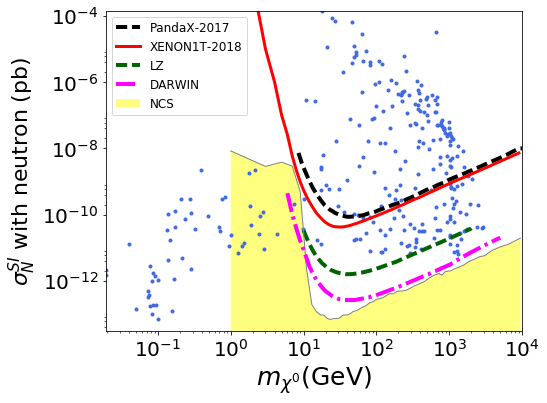

In [33]:
plt.figure(figsize=(8,6))

plt.loglog(xd.mchi, xd.SIN, color='royalblue', marker='o',ms=3,linestyle='', label=r'')

#plot pandaX data 1708.06917
m=np.arange(8.5,10000)
plt.loglog(m,pandaX(m)*1e+36,color='k',linestyle='dashed',lw=4,label='PandaX-2017')

#XENON1T
n=np.arange(1,9000)
plt.loglog(n,XENON1T(n)*1e+36,'r-',lw=3,label='XENON1T-2018')

#plt LZ
n=np.arange(10,2000)
plt.semilogy(n,LZSI(n)*1e+36,color='darkgreen',linestyle='--',lw=4,label='LZ')

#Neutrino coherent scattering
n=np.arange(1,9.5e+3,2)
plt.loglog(n,NCS(n),color='grey',lw=1.0,label='')
back=[]
for i in range(0,len(n)):
    m = NCS(n[i])
    back.append(m)
back=np.asarray(back)
plt.fill_between(n,1.e-38,back,facecolor='yellow',alpha=0.5,label='NCS')

# DARWIN SI
n=np.arange(6,5000)
plt.loglog(n,DARSI(n)*1e+36,color='magenta',linestyle='-.',lw=4,label='DARWIN')

plt.xlabel(r'$m_{\chi^0}$(GeV)',size=25)
plt.ylabel(r'$\sigma_N^{SI}$ with neutron (pb)',size=22)
plt.legend(prop={'size':12},loc='best')

plt.xlim(xd.mchi.min(),1.0e4)
plt.ylim(3e-14,xd.SIN.max())

plt.tight_layout()
#plt.savefig('plots/SI.pdf')
plt.show()

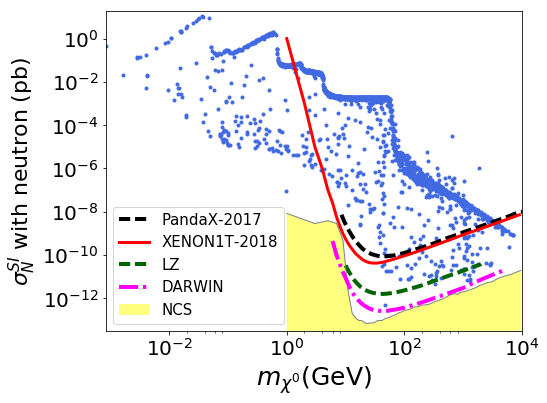

In [34]:
yd0 = xd[xd.mchi > 1]
yd = yd0[yd0.SIN < XENON1T(yd0.mchi)*1e+36]
zd = xd[xd.mchi < 1]

CONCAT good points

In [35]:
gd = pd.concat([yd,zd],ignore_index=True )
gd = gd.reset_index()
del[gd['index']]

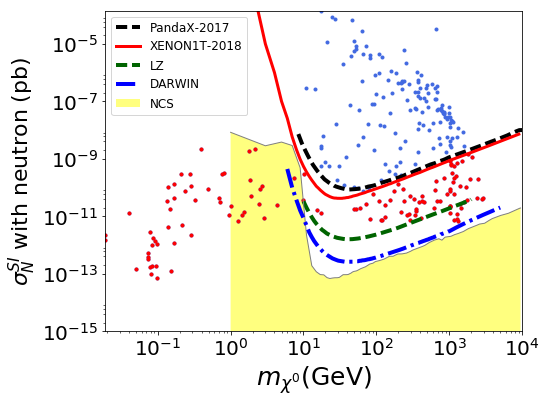

In [38]:
plt.figure(figsize=(8,6))

plt.loglog(xd.mchi, xd.SIN, color='royalblue', marker='o',ms=3,linestyle='', label=r'')
plt.loglog(gd.mchi, gd.SIN, color='red', marker='o',ms=3,linestyle='', label=r'')

#plot pandaX data 1708.06917
m=np.arange(8.5,10000)
plt.loglog(m,pandaX(m)*1e+36,color='k',linestyle='dashed',lw=4,label='PandaX-2017')

#XENON1T
n=np.arange(1,9000)
plt.loglog(n,XENON1T(n)*1e+36,'r-',lw=3,label='XENON1T-2018')

#plt LZ
n=np.arange(10,2000)
plt.semilogy(n,LZSI(n)*1e+36,color='darkgreen',linestyle='--',lw=4,label='LZ')

#Neutrino coherent scattering
n=np.arange(1,9.5e+3,2)
plt.loglog(n,NCS(n),color='grey',lw=1.0,label='')
back=[]
for i in range(0,len(n)):
    m = NCS(n[i])
    back.append(m)
back=np.asarray(back)
plt.fill_between(n,1.e-38,back,facecolor='yellow',alpha=0.5,label='NCS')

# DARWIN SI
n=np.arange(6,5000)
plt.loglog(n,DARSI(n)*1e+36,color='blue',linestyle='-.',lw=4,label='DARWIN')

plt.xlabel(r'$m_{\chi^0}$(GeV)',size=25)
plt.ylabel(r'$\sigma_N^{SI}$ with neutron (pb)',size=22)
plt.legend(prop={'size':12},loc='best')

plt.xlim(xd.mchi.min(),1.0e4)
plt.ylim(1e-15,xd.SIN.max())

plt.tight_layout()
plt.show()

PandaX limit buscar

### Anality SI cross-section

In [39]:
#Parameters
fN = 0.25
v = 244.868782
vev = 244.868782
#nucleon mass in GeV (proton and neutron mass)
MNp = 938.27*1.e-3
MNn = 939.56*1.e-3 
## GeV-2 to cm-2
#http://www.saha.ac.in/theory/palashbaran.pal/conv.html
GeVtomin2topb = (5.06*1.e+13)**(-2)*1.e+36

# XENON-129 and XENON-131
Z = 54
#A = 129
A = 131.293
#SARAH
GF = 1.166370e-05
MW = 79.6565734
MZ = 91.1887000
#MW      = 80.385
#MZ      = 91.187

Theta_W = np.arccos(MW/MZ)
alpha   = 1./137.035999
ce      = np.sqrt(4.*np.pi*alpha)
g       = ce/np.sin(Theta_W)
gp      = ce/np.cos(Theta_W)

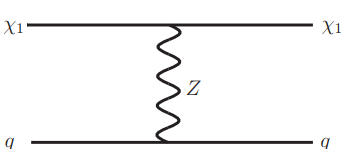

In [40]:
from IPython.display import Image
Image("vector-SI.png", width=400)

\begin{align}
\sigma^{SI}_{\chi N}= \dfrac{1}{4\pi}\dfrac{M_N^2m_{\chi^0}^2}{(M_N+m_{\chi^0})^2}\dfrac{g_B^4}{M_{Z'}^4}B^2
\end{align}

https://arxiv.org/pdf/1409.8165.pdf

In [41]:
xd['mr'] = MNn*xd.mchi/(MNn+xd.mchi)

In [42]:
xd['SIZp_vector'] = (1./(4*np.pi))*xd.mr**2*(xd.g1p**4/xd.MZp**4)*(-2+3)**2*GeVtomin2topb

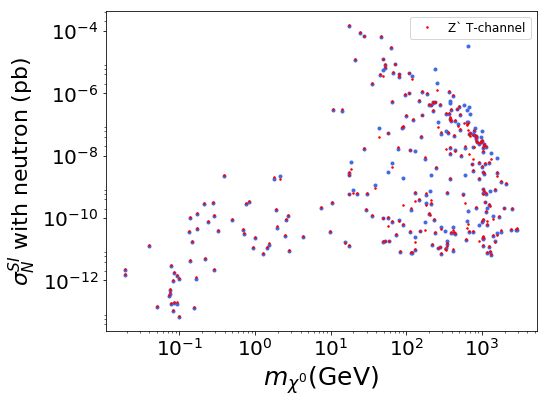

In [48]:
plt.figure(figsize=(8,6))

plt.loglog(xd.mchi, xd.SIN, color='royalblue', marker='o',ms=3,linestyle='', label=r'')
plt.loglog(xd.mchi, 3.0*xd.SIZp_vector, color='red', marker='.',ms=3,linestyle='', label=r'Z` T-channel')

#plt.xlim(xd.mchi.min(),1.0e4)
#plt.ylim(3e-14,2e1)
plt.xlabel(r'$m_{\chi^0}$(GeV)',size=25)
plt.ylabel(r'$\sigma_N^{SI}$ with neutron (pb)',size=22)
plt.legend(prop={'size':12},loc='best')

plt.tight_layout()
#plt.savefig('plots/SI.pdf')
plt.show()

Scalar interaction with the Higss

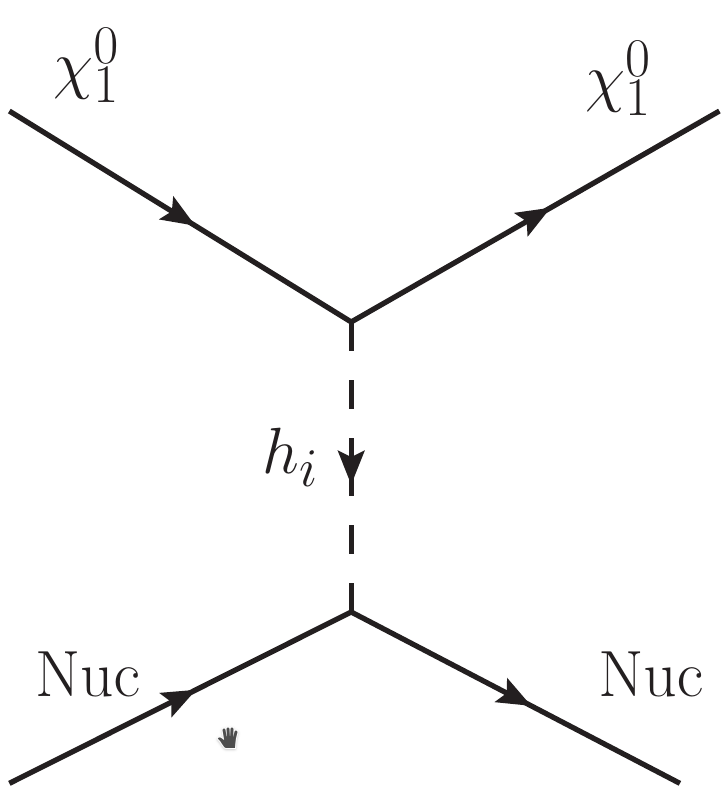

In [52]:
from IPython.display import Image
Image("SI-mass-basis.png", width=200)

\begin{equation}
\sigma_{SI} = 
\dfrac{m_r^2}{\pi}\left(\dfrac{(f_N) m_N}{v_{\text{SM}}}\right)^2
\left(\dfrac{C_{1}}{mh_1^2} + \dfrac{C_{2}}{mh_2^2} \right)^2
\end{equation}

\begin{equation}
C_{\chi^0\chi^0 h_k} = C_{k} = \dfrac{-i}{\sqrt{2}}\lambda_{a1}Z^H_{k2}
\end{equation}

In [53]:
Lambda1 = -0.130
vev = 244.868782
xd['thetaB'] = np.arctan(2*(-vev*xd.vx*xd.Lambda3)/((-3*(vev**2)*Lambda1 + (1/2)*(2*Lambda1*vev**2+xd.Lambda3*xd.vx**2) - 0.5*(xd.vx)**2*xd.Lambda3)-((1/2)*(xd.Lambda3*vev**2 + 2*xd.Lambda2*xd.vx**2) - 3*xd.vx**2*xd.Lambda2-0.5*vev**2*xd.Lambda3)))/2

In [54]:
xd['cxx1'] = (-1/np.sqrt(2)*xd.YA1*np.sin(xd.thetaB))
xd['cxx2'] = (-1/np.sqrt(2)*xd.YA1*np.cos(xd.thetaB))

In [55]:
xd['SI_scalar'] =(xd.mr**2/np.pi)*(fN*MNn/vev)**2*(xd.cxx1*np.cos(xd.thetaB)/xd.mh1**2 + xd.cxx2*np.sin(xd.thetaB)/xd.mh2**2)**2*GeVtomin2topb

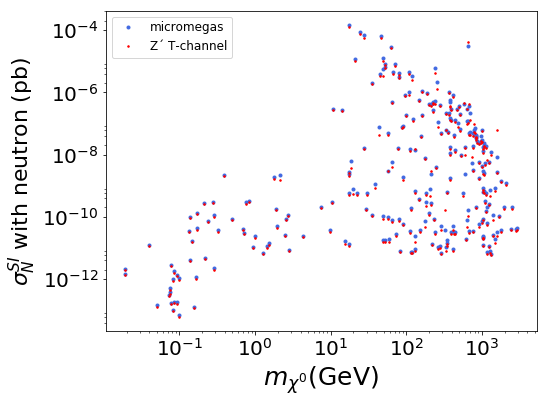

In [63]:
plt.figure(figsize=(8,6))

plt.loglog(xd.mchi, xd.SIN, color='royalblue', marker='o',ms=3,linestyle='', label=r'micromegas')
#plt.loglog(xd.mchi, xd.SI_scalar, color='green', marker='.',ms=3,linestyle='', label=r'scalar')
#plt.loglog(xd.mchi, 3*xd.SIZp_vector, color='red', marker='.',ms=3,linestyle='', label=r'Z´ T-channel')
plt.loglog(xd.mchi, xd.SI_scalar+2.5*xd.SIZp_vector, color='red', marker='.',ms=3,linestyle='', label=r'Z´ T-channel')

#plt.xlim(xd.mchi.min(),1.0e4)
#plt.ylim(3e-14,2e1)
plt.xlabel(r'$m_{\chi^0}$(GeV)',size=25)
plt.ylabel(r'$\sigma_N^{SI}$ with neutron (pb)',size=22)
plt.legend(prop={'size':12},loc='best')

plt.tight_layout()
#plt.savefig('plots/SI.pdf')
plt.show()

$\sigma_{SD}$

In [65]:
from scipy import interpolate

#LZ-1802.06039
names3 = ['MDM', 'LZSD']
lz = pd.read_csv('/home/anferivera/Work/Documents_compartidos/fits_experiments/fit_LZ/LZ-SD-neutron-prosp-2018.csv',names=names3, header=None)
LZSD=interpolate.interp1d(lz.MDM,lz.LZSD)

#DARWIN prospects
names1 = ['MDM', 'DAR']
dd1=pd.read_csv('/home/anferivera/Work/Documents_compartidos/fits_experiments/fit_Darwin/darwin-SD.csv', names=names1, header=None)
DARSD=interpolate.interp1d(dd1.MDM,dd1.DAR)

#XENON SD 2019
names2 = ['MDM', 'XENON1TSD']
xeSD=pd.read_csv('/home/anferivera/Work/Documents_compartidos/fits_experiments/fit_XENON1T/SD-2019/neutron.csv',names=names2, header=None)
XENON1TSD=interpolate.interp1d(xeSD.MDM,xeSD.XENON1TSD)

#IC WW SD DATA
ICc_sd = ['M', 'sigmaSD']
ICsd = np.loadtxt('/home/anferivera/Work/Documents_compartidos/fits_experiments/fit_IceCube/IceCubeWW.dat')
IC_SD = pd.DataFrame(ICsd, columns=ICc_sd)

# PICO-60 y PICO-2L
pico60columns = ['M','sigmaSD']
pico60datos = np.loadtxt('/home/anferivera/Work/Documents_compartidos/fits_experiments/fit_PICO/fig12-PICO-60.dat')
PICO60_SD = pd.DataFrame(pico60datos, columns=pico60columns)

#LUX  neutrons 1705.03380
names4 = ['M', 'sigmaSD']
luxSD = pd.read_csv('/home/anferivera/Work/Documents_compartidos/fits_experiments/fit_LUX/SD/LUX-SD-neutron-2017.csv',names=names4, header=None)
LUX_SD_n = interpolate.interp1d(luxSD.M, luxSD.sigmaSD)

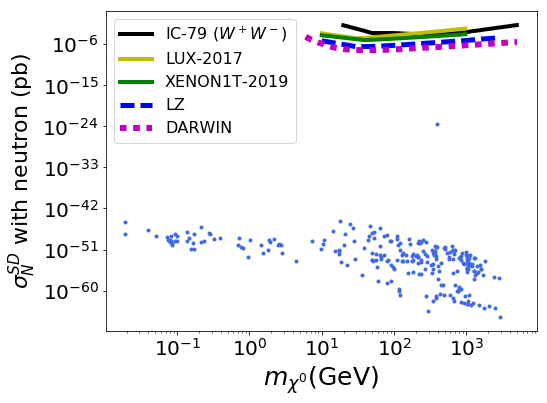

In [68]:
plt.figure(figsize=(8,6))
#For neutrons
plt.loglog(xd.mchi,xd['SDN'], color='royalblue', marker='o',ms=3,linestyle='',label='')
#plt.loglog(gd.mchi,gd['SDN'], color='red', marker='o',ms=3,linestyle='',label='')

#IceCube limit
plt.plot(10**IC_SD['M'],10**IC_SD['sigmaSD']*1e+36,'k-',lw=4,label=r'IC-79 ($W^+W^-$)')
#LUX-neutron
n=np.arange(10,990,20)
plt.plot(n,LUX_SD_n(n),'y',lw=4,label='LUX-2017')

#XENON1T
nx=np.arange(10,990,30)
plt.loglog(nx,XENON1TSD(nx)*1e+36,'g-',lw=4,label='XENON1T-2019')
#LZ-1802.06039
nn=np.arange(10,3000,20)
plt.loglog(nn,LZSD(nn)*1e+36,'b--',lw=5,label='LZ')

# DARWIN SD
n=np.arange(6,5000)
plt.loglog(n,DARSD(n)*1e+36,'m:',lw=6,label='DARWIN')

plt.xlabel(r'$m_{\chi^0}$(GeV)',size=25)
plt.ylabel(r'$\sigma_N^{SD}$ with neutron (pb)',size=22)
plt.legend(prop={'size':16},loc='best')
#plt.xlim(xd.mchi.min(),1.0e4)
#plt.ylim(xd.SDN.min(),xd.SDN.max())

plt.tight_layout()
#plt.savefig('plots/SD.pdf')
plt.show()

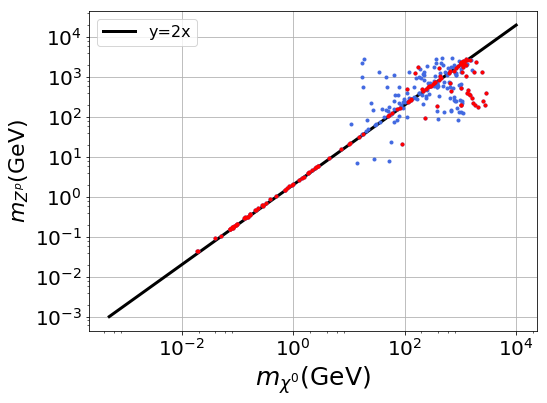

In [69]:
plt.figure(figsize=(8,6))

a = np.linspace(5e-4,1e+4,5)
plt.plot(a,2*a,'k-',lw=3,label='y=2x')

plt.loglog(xd.mchi,xd.MZp, color='royalblue', marker='o',ms=3,linestyle='',label='')
plt.loglog(gd.mchi,gd.MZp, color='red', marker='o',ms=3,linestyle='',label='')

plt.xlabel(r'$m_{\chi^0}$(GeV)',size=25)
plt.ylabel(r'$m_{Z^p}$(GeV)',size=22)
plt.legend(prop={'size':16},loc='best')
#plt.xlim(9,2.0e3)
#plt.ylim(1e-20,2e-1)

plt.grid()

plt.tight_layout()
#plt.savefig('plots/mchi_vs_mZp.pdf')
plt.show()

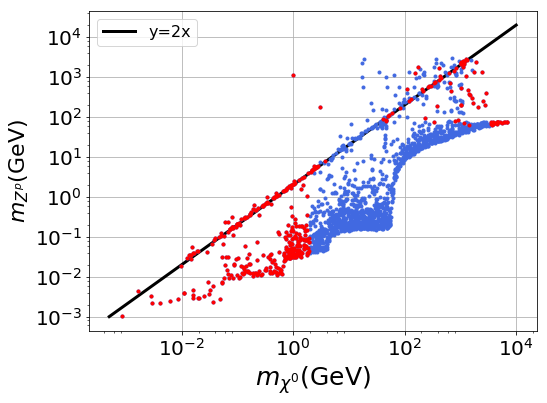

# $a_{\mu}=\dfrac{(g-2)\tau}{2}=116592040(54)\times 10^{-11}$ Fermilab

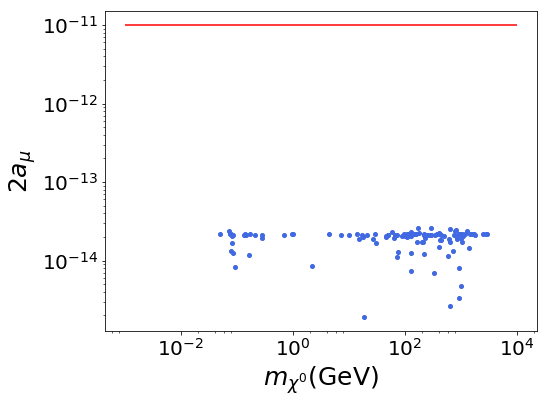

In [71]:
plt.figure(figsize=(8,6))

plt.loglog(xd.mchi, xd.g2mu, color='royalblue', marker='o',ms=4,linestyle='',label='')
#plt.loglog(gd.mchi, gd.g2mu, color='red', marker='o',ms=4,linestyle='',label='')

plt.hlines(1e-11,1e-3,1e4,'r')

plt.xlabel(r'$m_{\chi^0}$(GeV)',size=25)
plt.ylabel(r'$2 a_{\mu}$',size=25)
#plt.legend(prop={'size':16},loc='lower left')

plt.tight_layout()
plt.show()

# STU parameters

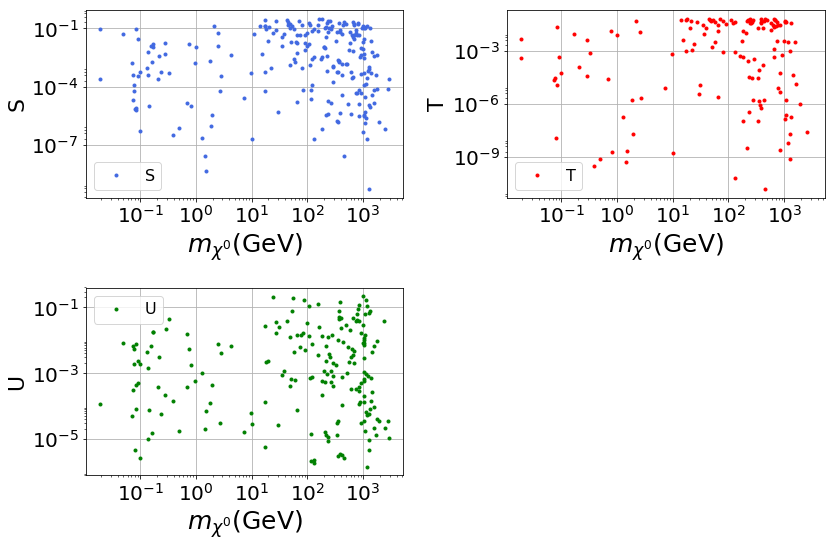

In [72]:
plt.figure(figsize=(12,8))

plt.subplot(2,2,1)
plt.loglog(xd.mchi, xd['S'], color='royalblue', marker='o',ms=3,linestyle='',label='S')

plt.xlabel(r'$m_{\chi^0}$(GeV)',size=25)
plt.ylabel(r'S',size=22)
plt.legend(prop={'size':16},loc='best')
plt.grid()

plt.subplot(2,2,2)
plt.loglog(xd.mchi, xd['T'], color='r', marker='o',ms=3,linestyle='',label='T')

plt.xlabel(r'$m_{\chi^0}$(GeV)',size=25)
plt.ylabel(r'T',size=22)
plt.legend(prop={'size':16},loc='best')
plt.grid()

plt.subplot(2,2,3)
plt.loglog(xd.mchi, xd['U'], color='g', marker='o',ms=3,linestyle='',label='U')

plt.xlabel(r'$m_{\chi^0}$(GeV)',size=25)
plt.ylabel(r'U',size=22)
plt.legend(prop={'size':16},loc='best')
plt.grid()

plt.tight_layout()
#plt.savefig('plots/mchi_STU.pdf')
plt.show()

## $\sigma v$ today

/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:3179: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=1e-10, top=1e-10
  'bottom=%s, top=%s') % (bottom, top))


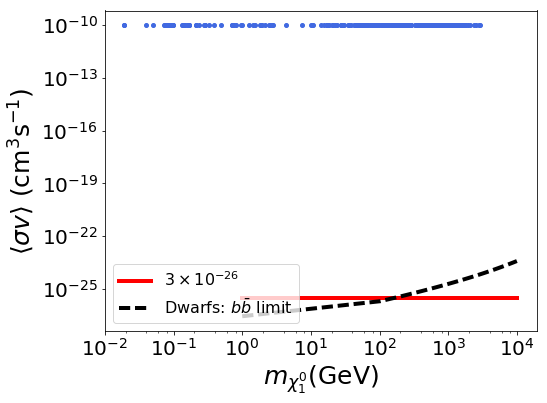

In [73]:
plt.figure(figsize=(8,6))

plt.loglog(xd.mchi, xd.sv, color='royalblue', marker='o',ms=4,linestyle='',label='')

#plt.hlines(3e-26,1,1e4,'r',lw=3,label=r'$3\times 10^{-26}$')
##Plot xx-->> bb --> tt
m=np.linspace(1,10000,100)
plt.plot(m,sigmav_bb_fit(m)*0+3e-26,'r',lw=4,label=r'$3\times 10^{-26}$')
plt.semilogy(m,sigmav_bb_fit(m),'k--',lw=4,label=r'Dwarfs: $b\bar{b}$ limit')
#plt.semilogy(m,sigmav_ww_fit(m),'g-',lw=4,label=r'Dwarfs: $WW$ limit')

plt.xlabel(r'$m_{\chi^0_1}$(GeV)',size=25)
plt.ylabel(r'$\langle\sigma v\rangle $ $($cm$^{3} $s$^{-1})$',size=25)
plt.legend(prop={'size':16},loc='lower left')
#plt.xlim(9,2e3)
#plt.ylim(1e-36,1e-24)

plt.tight_layout()
#plt.savefig('plots/sv.pdf')
#plt.show()

# Scaning the space parameter

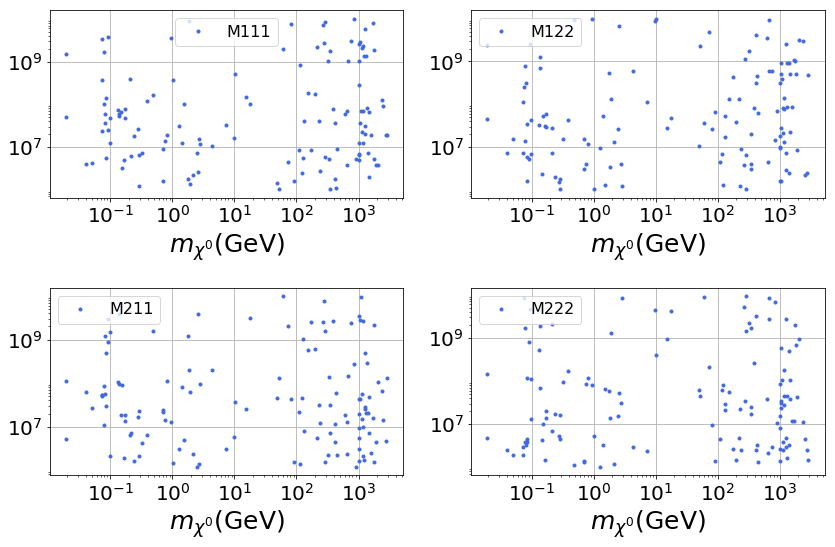

In [74]:
plt.figure(figsize=(12,8))

plt.subplot(2,2,1)
plt.loglog(gd.mchi, gd['M111'], color='royalblue', marker='o',ms=3,linestyle='',label='M111')

plt.xlabel(r'$m_{\chi^0}$(GeV)',size=25)
plt.legend(prop={'size':16},loc='best')
plt.grid()

plt.subplot(2,2,2)
plt.loglog(gd.mchi, gd['M122'], color='royalblue', marker='o',ms=3,linestyle='',label='M122')

plt.xlabel(r'$m_{\chi^0}$(GeV)',size=25)
plt.legend(prop={'size':16},loc='best')
plt.grid()

plt.subplot(2,2,3)
plt.loglog(gd.mchi, gd['M211'], color='royalblue', marker='o',ms=3,linestyle='',label='M211')

plt.xlabel(r'$m_{\chi^0}$(GeV)',size=25)
plt.legend(prop={'size':16},loc='best')
plt.grid()

plt.subplot(2,2,4)
plt.loglog(gd.mchi, gd['M222'], color='royalblue', marker='o',ms=3,linestyle='',label='M222')

plt.xlabel(r'$m_{\chi^0}$(GeV)',size=25)
plt.legend(prop={'size':16},loc='best')
plt.grid()

plt.tight_layout()
plt.show()

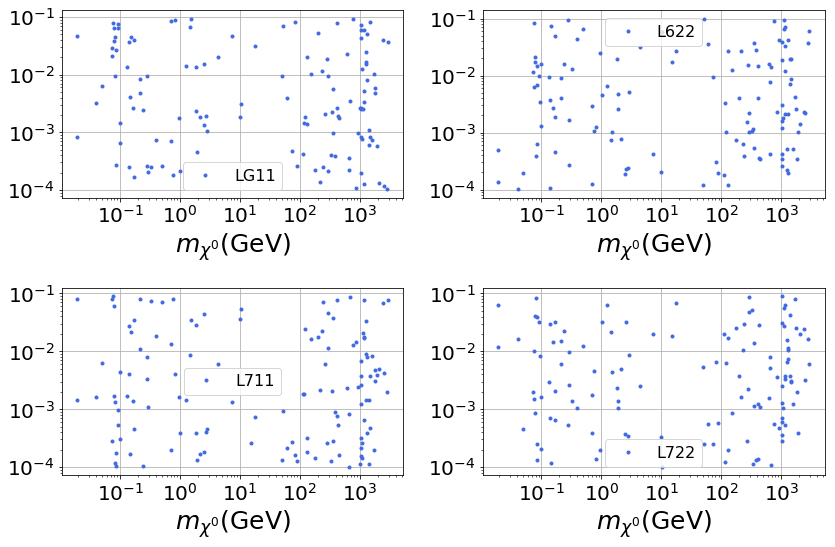

In [75]:
plt.figure(figsize=(12,8))

plt.subplot(2,2,1)
plt.loglog(gd.mchi, gd['L611'], color='royalblue', marker='o',ms=3,linestyle='',label='LG11')

plt.xlabel(r'$m_{\chi^0}$(GeV)',size=25)
plt.legend(prop={'size':16},loc='best')
plt.grid()

plt.subplot(2,2,2)
plt.loglog(gd.mchi, gd['L622'], color='royalblue', marker='o',ms=3,linestyle='',label='L622')

plt.xlabel(r'$m_{\chi^0}$(GeV)',size=25)
plt.legend(prop={'size':16},loc='best')
plt.grid()

plt.subplot(2,2,3)
plt.loglog(gd.mchi,gd['L711'], color='royalblue', marker='o',ms=3,linestyle='',label='L711')

plt.xlabel(r'$m_{\chi^0}$(GeV)',size=25)
plt.legend(prop={'size':16},loc='best')
plt.grid()

plt.subplot(2,2,4)
plt.loglog(gd.mchi, gd['L722'], color='royalblue', marker='o',ms=3,linestyle='',label='L722')

plt.xlabel(r'$m_{\chi^0}$(GeV)',size=25)
plt.legend(prop={'size':16},loc='best')
plt.grid()

plt.tight_layout()
plt.show()

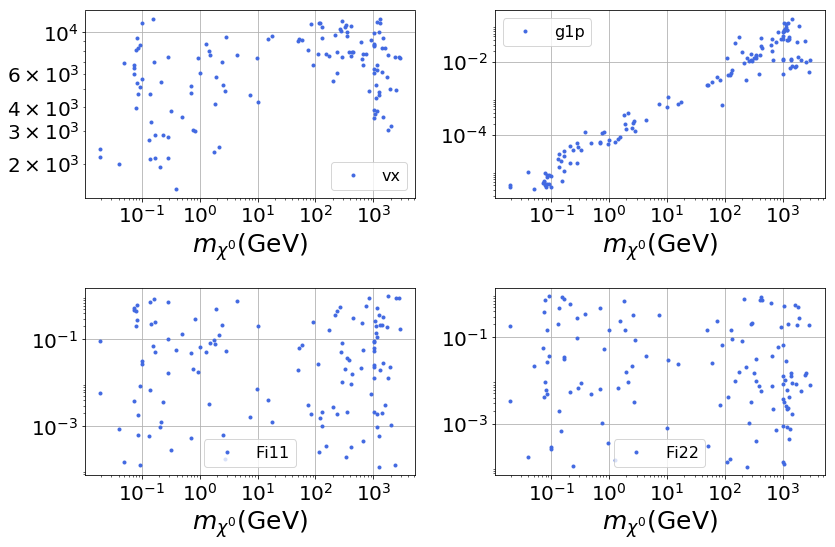

In [76]:
plt.figure(figsize=(12,8))

plt.subplot(2,2,1)
plt.loglog(gd.mchi, gd['vx'], color='royalblue', marker='o',ms=3,linestyle='',label='vx')

plt.xlabel(r'$m_{\chi^0}$(GeV)',size=25)
plt.legend(prop={'size':16},loc='best')
plt.grid()

plt.subplot(2,2,2)
plt.loglog(gd.mchi, gd['g1p'], color='royalblue', marker='o',ms=3,linestyle='',label='g1p')

plt.xlabel(r'$m_{\chi^0}$(GeV)',size=25)
plt.legend(prop={'size':16},loc='best')
plt.grid()

plt.subplot(2,2,3)
plt.loglog(gd.mchi, gd['Fi11'], color='royalblue', marker='o',ms=3,linestyle='',label='Fi11')

plt.xlabel(r'$m_{\chi^0}$(GeV)',size=25)
plt.legend(prop={'size':16},loc='best')
plt.grid()

plt.subplot(2,2,4)
plt.loglog(gd.mchi, gd['Fi22'], color='royalblue', marker='o',ms=3,linestyle='',label='Fi22')

plt.xlabel(r'$m_{\chi^0}$(GeV)',size=25)
plt.legend(prop={'size':16},loc='best')
plt.grid()

plt.tight_layout()
plt.show()

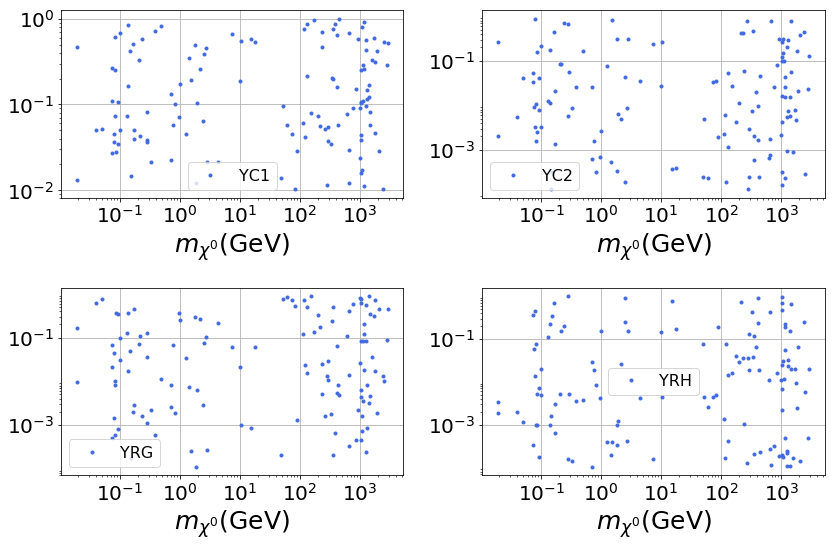

In [77]:
plt.figure(figsize=(12,8))

plt.subplot(2,2,1)
plt.loglog(gd.mchi, gd['YC1'], color='royalblue', marker='o',ms=3,linestyle='',label='YC1')

plt.xlabel(r'$m_{\chi^0}$(GeV)',size=25)
plt.legend(prop={'size':16},loc='best')
plt.grid()

plt.subplot(2,2,2)
plt.loglog(gd.mchi, gd['YC2'], color='royalblue', marker='o',ms=3,linestyle='',label='YC2')

plt.xlabel(r'$m_{\chi^0}$(GeV)',size=25)
plt.legend(prop={'size':16},loc='best')
plt.grid()

plt.subplot(2,2,3)
plt.loglog(gd.mchi, gd['YRG'], color='royalblue', marker='o',ms=3,linestyle='',label='YRG')

plt.xlabel(r'$m_{\chi^0}$(GeV)',size=25)
plt.legend(prop={'size':16},loc='best')
plt.grid()

plt.subplot(2,2,4)
plt.loglog(gd.mchi, gd['YRH'], color='royalblue', marker='o',ms=3,linestyle='',label='YRH')

plt.xlabel(r'$m_{\chi^0}$(GeV)',size=25)
plt.legend(prop={'size':16},loc='best')
plt.grid()

plt.tight_layout()
plt.show()

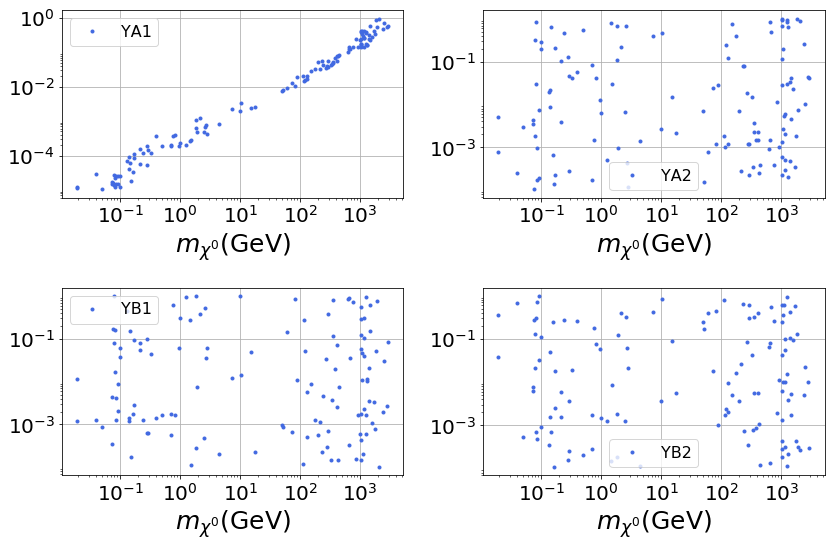

In [78]:
plt.figure(figsize=(12,8))

plt.subplot(2,2,1)
plt.loglog(gd.mchi, gd['YA1'], color='royalblue', marker='o',ms=3,linestyle='',label='YA1')

plt.xlabel(r'$m_{\chi^0}$(GeV)',size=25)
plt.legend(prop={'size':16},loc='best')
plt.grid()

plt.subplot(2,2,2)
plt.loglog(gd.mchi, gd['YA2'], color='royalblue', marker='o',ms=3,linestyle='',label='YA2')

plt.xlabel(r'$m_{\chi^0}$(GeV)',size=25)
plt.legend(prop={'size':16},loc='best')
plt.grid()

plt.subplot(2,2,3)
plt.loglog(gd.mchi, gd['YB1'], color='royalblue', marker='o',ms=3,linestyle='',label='YB1')

plt.xlabel(r'$m_{\chi^0}$(GeV)',size=25)
plt.legend(prop={'size':16},loc='best')
plt.grid()

plt.subplot(2,2,4)
plt.loglog(gd.mchi, gd['YB2'], color='royalblue', marker='o',ms=3,linestyle='',label='YB2')

plt.xlabel(r'$m_{\chi^0}$(GeV)',size=25)
plt.legend(prop={'size':16},loc='best')
plt.grid()

plt.tight_layout()
plt.show()

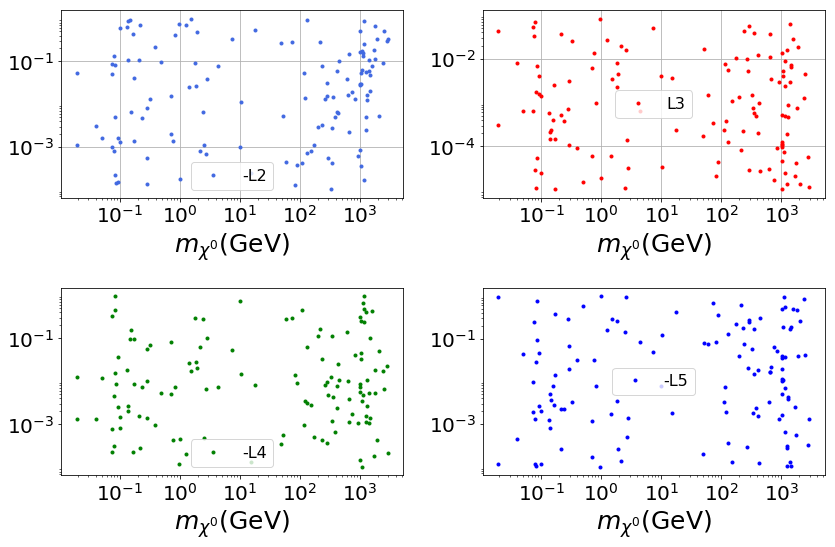

In [79]:
plt.figure(figsize=(12,8))

plt.subplot(2,2,1)
plt.loglog(gd.mchi, -gd['Lambda2'], color='royalblue', marker='o',ms=3,linestyle='',label='-L2')

plt.xlabel(r'$m_{\chi^0}$(GeV)',size=25)
plt.legend(prop={'size':16},loc='best')
plt.grid()

plt.subplot(2,2,2)
plt.loglog(gd.mchi, gd['Lambda3'], color='r', marker='o',ms=3,linestyle='',label='L3')

plt.xlabel(r'$m_{\chi^0}$(GeV)',size=25)
plt.legend(prop={'size':16},loc='best')
plt.grid()

plt.subplot(2,2,3)
plt.loglog(gd.mchi, -gd['Lambda4'], color='g', marker='o',ms=3,linestyle='',label='-L4')

plt.xlabel(r'$m_{\chi^0}$(GeV)',size=25)
plt.legend(prop={'size':16},loc='best')

plt.subplot(2,2,4)
plt.loglog(gd.mchi, -gd['Lambda5'], color='b', marker='o',ms=3,linestyle='',label='-L5')

plt.xlabel(r'$m_{\chi^0}$(GeV)',size=25)
plt.legend(prop={'size':16},loc='best')
plt.grid()
plt.grid()

plt.tight_layout()
plt.show()

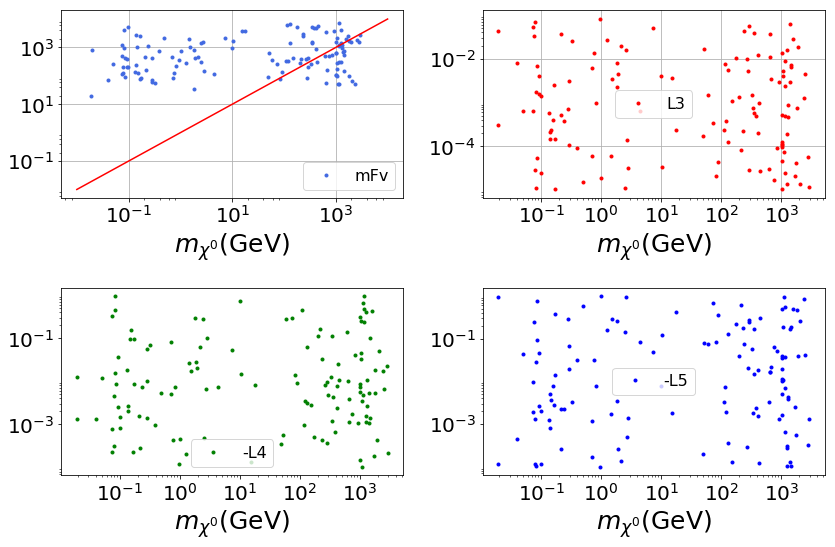

In [80]:
plt.figure(figsize=(12,8))

plt.subplot(2,2,1)
plt.loglog(gd.mchi, gd['mFv'], color='royalblue', marker='o',ms=3,linestyle='',label='mFv')

a = np.linspace(1e-2,1e4,5)
plt.plot(a,a,'r-')

plt.xlabel(r'$m_{\chi^0}$(GeV)',size=25)
plt.legend(prop={'size':16},loc='best')
plt.grid()

plt.subplot(2,2,2)
plt.loglog(gd.mchi, gd['Lambda3'], color='r', marker='o',ms=3,linestyle='',label='L3')

plt.xlabel(r'$m_{\chi^0}$(GeV)',size=25)
plt.legend(prop={'size':16},loc='best')
plt.grid()

plt.subplot(2,2,3)
plt.loglog(gd.mchi, -gd['Lambda4'], color='g', marker='o',ms=3,linestyle='',label='-L4')

plt.xlabel(r'$m_{\chi^0}$(GeV)',size=25)
plt.legend(prop={'size':16},loc='best')

plt.subplot(2,2,4)
plt.loglog(gd.mchi, -gd['Lambda5'], color='b', marker='o',ms=3,linestyle='',label='-L5')

plt.xlabel(r'$m_{\chi^0}$(GeV)',size=25)
plt.legend(prop={'size':16},loc='best')
plt.grid()
plt.grid()

plt.tight_layout()
plt.show()

In [81]:
kk = gd[gd.mchi < gd.mFv]

In [82]:
print(kk.shape, gd.shape)

(92, 105) (128, 105)


# 